# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

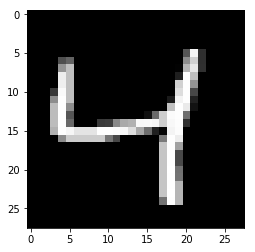

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [21]:
# Size of the encoding layer (the hidden layer)
feature_dim = 784
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, feature_dim])
targets_ = tf.placeholder(tf.float32, shape=[None, feature_dim])

# Output of hidden layer, single fully connected layer here with ReLU activation
encode_weight = tf.Variable(tf.truncated_normal([feature_dim, encoding_dim], stddev=0.1))
encode_bias = tf.Variable(tf.constant(0.1, shape=[encoding_dim]))
encoded = tf.nn.relu(tf.matmul(inputs_, encode_weight) + encode_bias)

# Output layer logits, fully connected layer with no activation
decode_weight = tf.Variable(tf.truncated_normal([encoding_dim, feature_dim], stddev=0.1))
decode_bias = tf.Variable(tf.constant(0.1, shape=[feature_dim]))
logits = tf.matmul(encoded, decode_weight) + decode_bias
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [12]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [22]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.7399
Epoch: 1/20... Training loss: 0.7339
Epoch: 1/20... Training loss: 0.7284
Epoch: 1/20... Training loss: 0.7244
Epoch: 1/20... Training loss: 0.7190
Epoch: 1/20... Training loss: 0.7137
Epoch: 1/20... Training loss: 0.7091
Epoch: 1/20... Training loss: 0.7022
Epoch: 1/20... Training loss: 0.6963
Epoch: 1/20... Training loss: 0.6879
Epoch: 1/20... Training loss: 0.6808
Epoch: 1/20... Training loss: 0.6699
Epoch: 1/20... Training loss: 0.6627
Epoch: 1/20... Training loss: 0.6515
Epoch: 1/20... Training loss: 0.6385
Epoch: 1/20... Training loss: 0.6251
Epoch: 1/20... Training loss: 0.6129
Epoch: 1/20... Training loss: 0.5959
Epoch: 1/20... Training loss: 0.5836
Epoch: 1/20... Training loss: 0.5656
Epoch: 1/20... Training loss: 0.5515
Epoch: 1/20... Training loss: 0.5386
Epoch: 1/20... Training loss: 0.5208
Epoch: 1/20... Training loss: 0.5031
Epoch: 1/20... Training loss: 0.4851
Epoch: 1/20... Training loss: 0.4720
Epoch: 1/20... Training loss: 0.4616
E

Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1790
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1732
Epoch: 1/20... Training loss: 0.1798
Epoch: 1/20... Training loss: 0.1774
Epoch: 1/20... Training loss: 0.1797
Epoch: 1/20... Training loss: 0.1743
Epoch: 1/20... Training loss: 0.1800
Epoch: 1/20... Training loss: 0.1801
Epoch: 1/20... Training loss: 0.1778
Epoch: 1/20... Training loss: 0.1745
Epoch: 1/20... Training loss: 0.1760
Epoch: 1/20... Training loss: 0.1760
Epoch: 1/20... Training loss: 0.1749
Epoch: 1/20... Training loss: 0.1723
Epoch: 1/20... Training loss: 0.1761
Epoch: 1/20... Training loss: 0.1767
Epoch: 1/20... Training loss: 0.1791
Epoch: 1/20... Training loss: 0.1778
Epoch: 1/20... Training loss: 0.1780
Epoch: 1/20... Training loss: 0.1762
Epoch: 1/20... Training loss: 0.1684
Epoch: 1/20... Training loss: 0.1669
Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1725
Epoch: 2/20... Training loss: 0.1714
E

Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1471
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1473
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1471
Epoch: 2/20... Training loss: 0.1473
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1471
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1451
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1431
Epoch: 2/20... Training loss: 0.1439
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1441
Epoch: 2/20... Training loss: 0.1478
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1461
E

Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1264
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1227
Epoch: 3/20... Training loss: 0.1270
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1248
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1283
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1314
E

Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1161
E

Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1179
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1103
E

Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1027
E

Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.0983
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.0978
Epoch: 6/20... Training loss: 0.0959
Epoch: 6/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1031
E

Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1006
E

Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0969
E

Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1015
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1013
E

Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0905
Epoch: 11/20... Training loss: 0.1005
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0991
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.1001
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0902
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0992
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0898
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0999
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0990
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0883
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0988
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

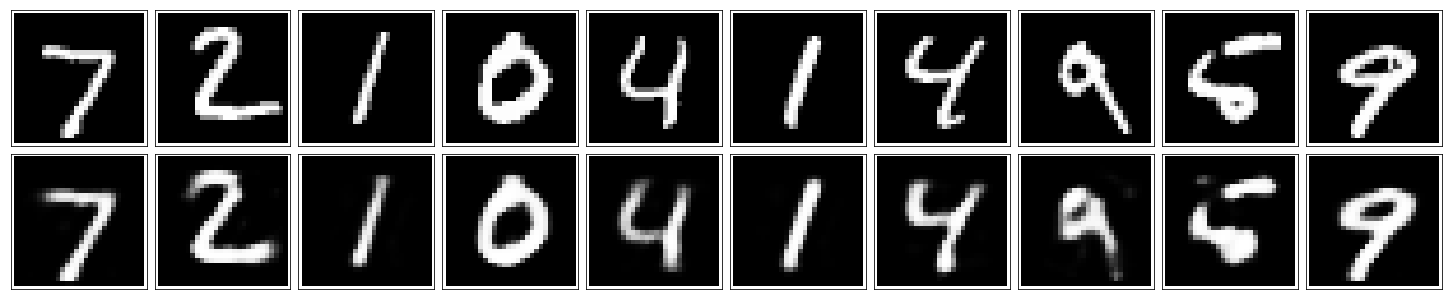

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.